In [2]:
%load_ext kedro.extras.extensions.ipython

2022-07-01 20:38:42,727 - root - INFO - Updated path to Kedro project: C:\Users\Lianz\Documents\medgc-tesis
2022-07-01 20:38:44,283 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.


d:\Programs\Anaconda3\envs\medgc-tesis-v2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\Programs\Anaconda3\envs\medgc-tesis-v2\lib\site-packages\torchvision\transforms\functional_pil.py:228: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  interpolation: int = Image.BILINEAR,
d:\Programs\Anaconda3\envs\medgc-tesis-v2\lib\site-packages\torchvision\transforms\functional_pil.py:295: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
d:\Programs\Anaconda3\envs\medgc-tesis-v2\lib\site-packages\torchvision\transforms\functional_pil.py:311: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-

2022-07-01 20:38:48,805 - root - INFO - ** Kedro project MEDGC Tesis
2022-07-01 20:38:48,806 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`
2022-07-01 20:38:50,088 - root - INFO - Registered line magic `run_viz`


In [3]:
predicciones_afn = catalog.load("modelo_afn_predicciones")
predicciones_dann = catalog.load("modelo_dann_predicciones")
predicciones_mdd = catalog.load("modelo_mdd_predicciones")
predicciones_adda = catalog.load("modelo_adda_predicciones")
predicciones_source_only = catalog.load("modelo_source_only_predicciones")
predicciones_target_only = catalog.load("modelo_target_only_predicciones")

2022-07-01 20:38:50,131 - kedro.io.data_catalog - INFO - Loading data from `modelo_afn_predicciones` (CSVDataSet)...
2022-07-01 20:38:50,726 - kedro.io.data_catalog - INFO - Loading data from `modelo_dann_predicciones` (CSVDataSet)...
2022-07-01 20:38:50,903 - kedro.io.data_catalog - INFO - Loading data from `modelo_mdd_predicciones` (CSVDataSet)...
2022-07-01 20:38:51,075 - kedro.io.data_catalog - INFO - Loading data from `modelo_adda_predicciones` (CSVDataSet)...
2022-07-01 20:38:51,253 - kedro.io.data_catalog - INFO - Loading data from `modelo_source_only_predicciones` (CSVDataSet)...
2022-07-01 20:38:51,424 - kedro.io.data_catalog - INFO - Loading data from `modelo_target_only_predicciones` (CSVDataSet)...


In [94]:
import pandas as pd

pd.set_option('display.max_rows', 500)

In [5]:
predicciones_source_only["algoritmo"] = "source_only"
predicciones_target_only["algoritmo"] = "target_only"
predicciones_afn["algoritmo"] = "afn"
predicciones_dann["algoritmo"] = "dann"
predicciones_mdd["algoritmo"] = "mdd"
predicciones_adda["algoritmo"] = "adda"

predicciones = pd.concat(
    [
        predicciones_source_only,
        predicciones_afn,
        predicciones_mdd,
        predicciones_dann,
        predicciones_adda,
        predicciones_target_only,
    ],
    ignore_index=True,
)

predicciones = predicciones.drop(
    columns=[
        "cant_digitos",
        "min_size_digitos",
        "max_size_digitos",
        "min_prop_blanco_digitos",
        "max_prop_blanco_digitos",
    ]
)

predicciones["acierto"] = (predicciones["votos"] == predicciones["voto_predicho"]).astype(int)

In [6]:
predicciones.groupby(['algoritmo', 'partido', 'tipo']).agg(
    cantidad_real=('votos', 'sum'),
    cantidad_pred=('voto_predicho', 'sum'),
    iou_promedio=('iou', 'mean'),
    acierto_exacto_promedio=('acierto', 'mean'),
)

cantidad_real  \
algoritmo   partido                                        tipo                                  
adda        FRENTE AMPLIO PROGRESISTA                      DIPUTADOS NACIONALES         179485   
                                                           SENADORES NACIONALES         184167   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD DIPUTADOS NACIONALES          32304   
                                                           SENADORES NACIONALES          32144   
            FRENTE DE TODOS                                DIPUTADOS NACIONALES         460760   
...                                                                                        ...   
target_only SOBERANIA POPULAR                              SENADORES NACIONALES          52386   
            SOMOS FUTURO                                   DIPUTADOS NACIONALES          33967   
                                                           SENADORES NACIONALES          32688   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD            DIPUTADOS NACIONALES          58837   
                                                           SENADORES NACIONALES          55600   

                                                                                 cantidad_pred  \
algoritmo   partido                                        tipo                                  
adda        FRENTE AMPLIO PROGRESISTA                      DIPUTADOS NACIONALES         277695   
                                                           SENADORES NACIONALES         271756   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD DIPUTADOS NACIONALES         117372   
                                                           SENADORES NACIONALES         122003   
            FRENTE DE TODOS                                DIPUTADOS NACIONALES         601890   
...                                                                                        ...   
target_only SOBERANIA POPULAR                              SENADORES NACIONALES          89323   
            SOMOS FUTURO                                   DIPUTADOS NACIONALES          52716   
                                                           SENADORES NACIONALES          52030   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD            DIPUTADOS NACIONALES          79539   
                                                           SENADORES NACIONALES          73873   

                                                                                 iou_promedio  \
algoritmo   partido                                        tipo                                 
adda        FRENTE AMPLIO PROGRESISTA                      DIPUTADOS NACIONALES      0.760357   
                                                           SENADORES NACIONALES      0.755874   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD DIPUTADOS NACIONALES      0.810868   
                                                           SENADORES NACIONALES      0.805484   
            FRENTE DE TODOS                                DIPUTADOS NACIONALES      0.815177   
...                                                                                       ...   
target_only SOBERANIA POPULAR                              SENADORES NACIONALES      0.917421   
            SOMOS FUTURO                                   DIPUTADOS NACIONALES      0.928629   
                                                           SENADORES NACIONALES      0.924579   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD            DIPUTADOS NACIONALES      0.926440   
                                                           SENADORES NACIONALES      0.927686   

                                                                                 acierto_exacto_promedio  
algoritmo   partido                                        tipo                                           
adda        FRENTE AMPLIO PROGRESISTA                  

In [7]:
predicciones.groupby(['algoritmo', 'partido']).agg(
    cantidad_real=('votos', 'sum'),
    cantidad_pred=('voto_predicho', 'sum'),
    iou_promedio=('iou', 'mean'),
    acierto_exacto_promedio=('acierto', 'mean'),
)

cantidad_real  \
algoritmo   partido                                                         
adda        FRENTE AMPLIO PROGRESISTA                              363652   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64448   
            FRENTE DE TODOS                                        936918   
            JUNTOS POR EL CAMBIO                                  1194025   
            PODEMOS                                                 53310   
            PRIMERO SANTA FE                                        47209   
            SOBERANIA POPULAR                                      118996   
            SOMOS FUTURO                                            66655   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114437   
afn         FRENTE AMPLIO PROGRESISTA                              363652   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64448   
            FRENTE DE TODOS                                        936918   
            JUNTOS POR EL CAMBIO                                  1194025   
            PODEMOS                                                 53310   
            PRIMERO SANTA FE                                        47209   
            SOBERANIA POPULAR                                      118996   
            SOMOS FUTURO                                            66655   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114437   
dann        FRENTE AMPLIO PROGRESISTA                              363652   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64448   
            FRENTE DE TODOS                                        936918   
            JUNTOS POR EL CAMBIO                                  1194025   
            PODEMOS                                                 53310   
            PRIMERO SANTA FE                                        47209   
            SOBERANIA POPULAR                                      118996   
            SOMOS FUTURO                                            66655   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114437   
mdd         FRENTE AMPLIO PROGRESISTA                              363652   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64448   
            FRENTE DE TODOS                                        936918   
            JUNTOS POR EL CAMBIO                                  1194025   
            PODEMOS                                                 53310   
            PRIMERO SANTA FE                                        47209   
            SOBERANIA POPULAR                                      118996   
            SOMOS FUTURO                                            66655   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114437   
source_only FRENTE AMPLIO PROGRESISTA                              363652   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64448   
            FRENTE DE TODOS                                        936918   
            JUNTOS POR EL CAMBIO                                  1194025   
            PODEMOS                                                 53310   
            PRIMERO SANTA FE                                        47209   
            SOBERANIA POPULAR                                      118996   
            SOMOS FUTURO                                            66655   
            UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114437   
target_only FRENTE AMPLIO PROGRESISTA                              363652   
            FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64448   
            FRENTE DE TODOS                                        936918   
            JUNTOS POR EL CAMBIO                                  1194025   
            PODEMOS                                                 53310   
            PRIMERO SANTA FE                            

In [8]:
predicciones.groupby(['algoritmo', 'tipo']).agg(
    cantidad_real=('votos', 'sum'),
    cantidad_pred=('voto_predicho', 'sum'),
    iou_promedio=('iou', 'mean'),
    acierto_exacto_promedio=('acierto', 'mean'),
)

cantidad_real  cantidad_pred  iou_promedio  \
algoritmo   tipo                                                               
adda        DIPUTADOS NACIONALES        1476056        2639502      0.787687   
            SENADORES NACIONALES        1483594        2684129      0.784834   
afn         DIPUTADOS NACIONALES        1476056        4300079      0.752082   
            SENADORES NACIONALES        1483594        4276321      0.753494   
dann        DIPUTADOS NACIONALES        1476056        2677303      0.756432   
            SENADORES NACIONALES        1483594        2681694      0.754514   
mdd         DIPUTADOS NACIONALES        1476056        3239688      0.689976   
            SENADORES NACIONALES        1483594        3331265      0.692342   
source_only DIPUTADOS NACIONALES        1476056        6855125      0.590188   
            SENADORES NACIONALES        1483594        6727436      0.588565   
target_only DIPUTADOS NACIONALES        1476056        1566791      0.924548   
            SENADORES NACIONALES        1483594        1589451      0.923542   

                                  acierto_exacto_promedio  
algoritmo   tipo                                           
adda        DIPUTADOS NACIONALES                 0.725082  
            SENADORES NACIONALES                 0.722348  
afn         DIPUTADOS NACIONALES                 0.651304  
            SENADORES NACIONALES                 0.653283  
dann        DIPUTADOS NACIONALES                 0.686507  
            SENADORES NACIONALES                 0.684730  
mdd         DIPUTADOS NACIONALES                 0.603338  
            SENADORES NACIONALES                 0.605384  
source_only DIPUTADOS NACIONALES                 0.420562  
            SENADORES NACIONALES                 0.421987  
target_only DIPUTADOS NACIONALES                 0.898164  
            SENADORES NACIONALES                 0.895966

In [9]:
from matplotlib import pyplot as plt

In [56]:
algorithms = ['source_only', 'mdd', 'afn', 'dann', 'adda', 'target_only']

In [61]:
def plot_iou_by_algorithm(predicciones):
    ious = (
        predicciones
        .groupby(['algoritmo', 'id_telegrama'], as_index=False)
        .agg(iou=('iou', 'mean'))
    )

    fig, axes = plt.subplots(ncols=len(algorithms), nrows=1, figsize=(25, 4))
    for algorithm, ax in zip(algorithms, axes):
        data = ious.query(f"algoritmo == '{algorithm}'").drop(columns=['algoritmo'])
        data.hist(alpha=0.5, label=algorithm, ax=ax, legend=False)
        ax.set_title(algorithm)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 3_000)

    plt.show()
    return ious

def plot_aciertos_by_algorithm(predicciones):
    aciertos = (
        predicciones
        .groupby(['algoritmo', 'id_telegrama'], as_index=False)
        .agg(aciertos=('acierto', 'sum'))
        .groupby(['algoritmo', 'aciertos'], as_index=False)
        .agg(cantidad=('algoritmo', 'count'))
    )

    fig, axes = plt.subplots(ncols=len(algorithms), nrows=1, figsize=(25, 4))
    for algorithm, ax in zip(algorithms, axes):
        data = aciertos.query(f"algoritmo == '{algorithm}'").drop(columns=['algoritmo'])
        data.set_index('aciertos').plot(kind='bar', alpha=0.5, label=algorithm, ax=ax, legend=False)
        ax.set_title(algorithm)
        ax.grid()
        ax.set_xlim(0, 18)
        ax.set_ylim(0, 1_500)

    plt.show()
    return aciertos

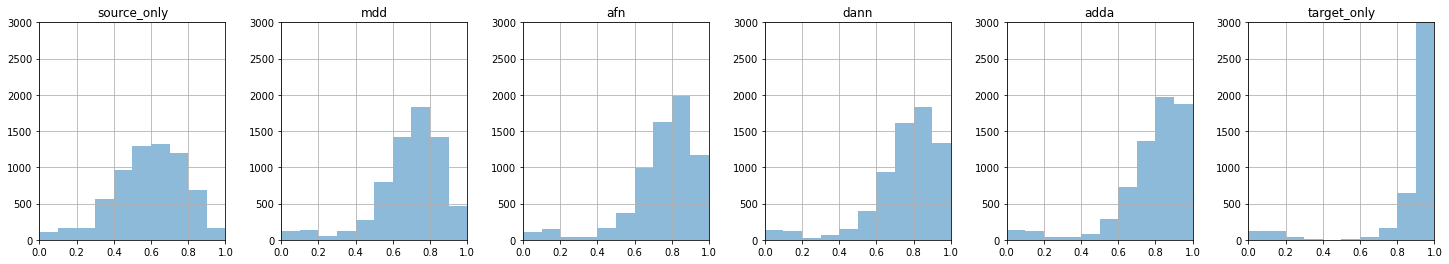

In [62]:
ious = plot_iou_by_algorithm(predicciones)

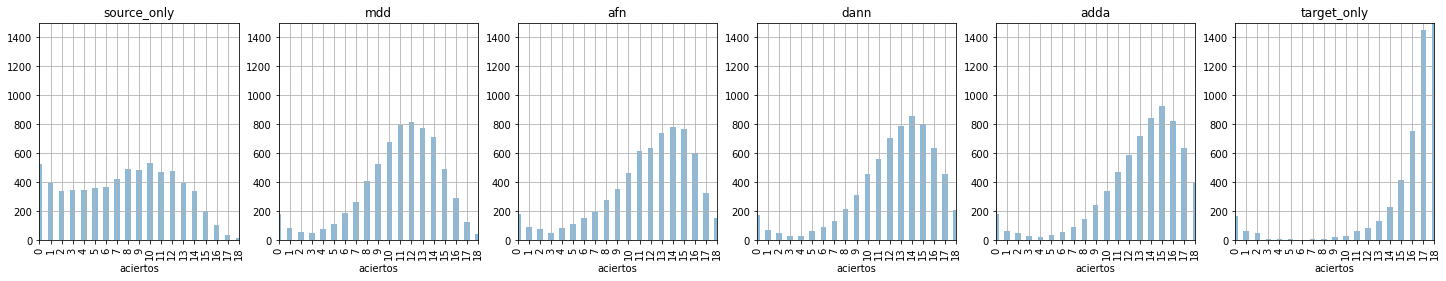

In [63]:
aciertos = plot_aciertos_by_algorithm(predicciones)

In [64]:
telegramas_mal_extraidos = (
    predicciones
    .query("algoritmo == 'target_only'")
    .groupby('id_telegrama', as_index=False)
    .agg(iou=('iou', 'mean'))
    .query("iou < 0.3")
    ['id_telegrama']
    .values
)

In [65]:
len(telegramas_mal_extraidos)

273

In [66]:
predicciones_bien_extraidas = predicciones[~predicciones.id_telegrama.isin(telegramas_mal_extraidos)]

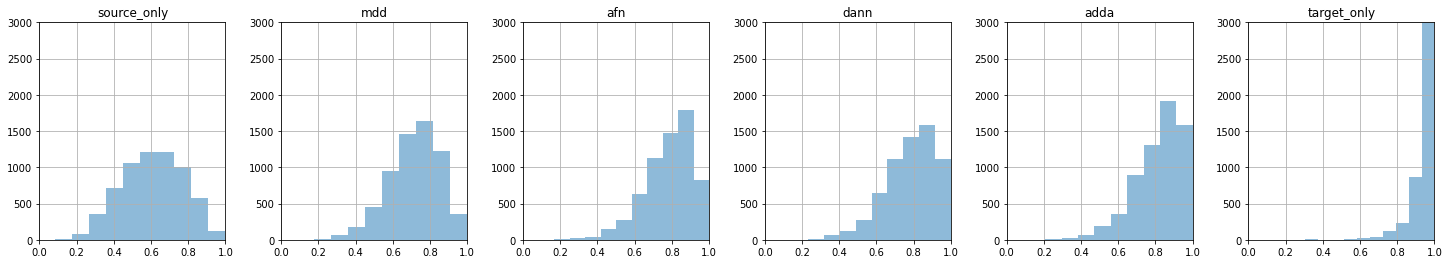

In [69]:
ious_bien_extraidas = plot_iou_by_algorithm(predicciones_bien_extraidas)

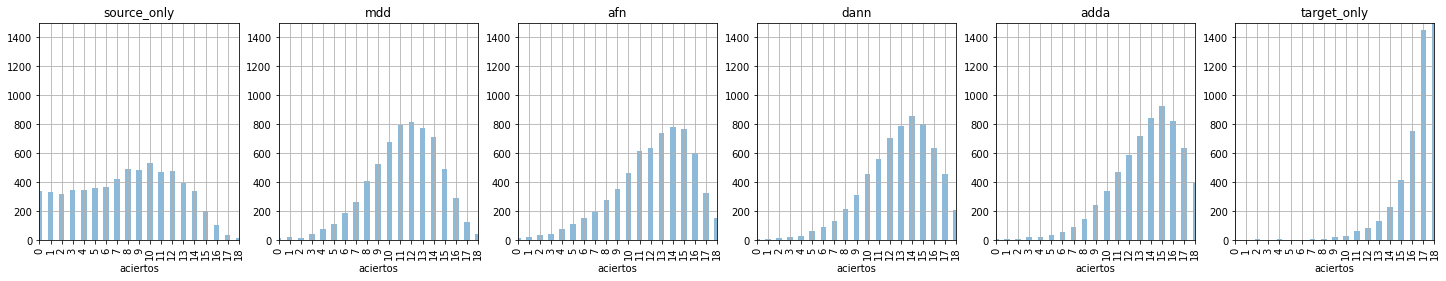

In [70]:
aciertos_bien_extraidas = plot_aciertos_by_algorithm(predicciones_bien_extraidas)

In [112]:
(
    predicciones_bien_extraidas
    .query("algoritmo == 'adda'")
    .groupby('id_telegrama', as_index=False)
    .agg(iou=('iou', 'mean'), accuracy=('acierto', 'mean'))
    .query("accuracy < 0.5")
    .sort_values(by='accuracy', ascending=True)
).head(10)

,id_telegrama,iou,accuracy
2421,2100903008X,0.370370,0.000000
1131,2100601364X,0.240741,0.000000
3013,2101103732X,0.305556,0.000000
6044,2102007778X,0.236111,0.000000
2420,2100903007X,0.402778,0.000000
4600,2101305782X,0.361111,0.055556
3202,2101303964X,0.518519,0.055556
5399,2101606884X,0.537037,0.055556
981,2100601167X,0.212963,0.055556
2184,2100902731X,0.546296,0.055556


In [72]:
from PIL import Image
import cv2
from IPython.display import display

In [73]:
def imgshow(img) -> None:
    display(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

In [113]:
img_id = '2100903008X'

In [114]:
(
    predicciones_bien_extraidas
    .query(f"id_telegrama == '{img_id}' and algoritmo == 'adda'")
)

,id_telegrama,partido,tipo,mesa,votos,voto_predicho,iou,algoritmo,acierto
521982,2100903008X,UNITE POR LA LIBERTAD Y LA DIGNIDAD,SENADORES NACIONALES,03008X,20,830,0.250000,adda,0
521983,2100903008X,UNITE POR LA LIBERTAD Y LA DIGNIDAD,DIPUTADOS NACIONALES,03008X,22,420,0.333333,adda,0
521984,2100903008X,FRENTE AMPLIO PROGRESISTA,SENADORES NACIONALES,03008X,33,833,0.500000,adda,0
521985,2100903008X,FRENTE AMPLIO PROGRESISTA,DIPUTADOS NACIONALES,03008X,29,429,0.666667,adda,0
521986,2100903008X,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,SENADORES NACIONALES,03008X,5,885,0.500000,adda,0
521987,2100903008X,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,DIPUTADOS NACIONALES,03008X,5,485,0.333333,adda,0
521988,2100903008X,JUNTOS POR EL CAMBIO,SENADORES NACIONALES,03008X,79,879,0.666667,adda,0
521989,2100903008X,JUNTOS POR EL CAMBIO,DIPUTADOS NACIONALES,03008X,81,48,0.333333,adda,0
521990,2100903008X,PRIMERO SANTA FE,SENADORES NACIONALES,03008X,0,887,0.000000,adda,0
521991,2100903008X,PRIMERO SANTA FE,DIPUTADOS NACIONALES,03008X,0,577,0.000000,adda,0


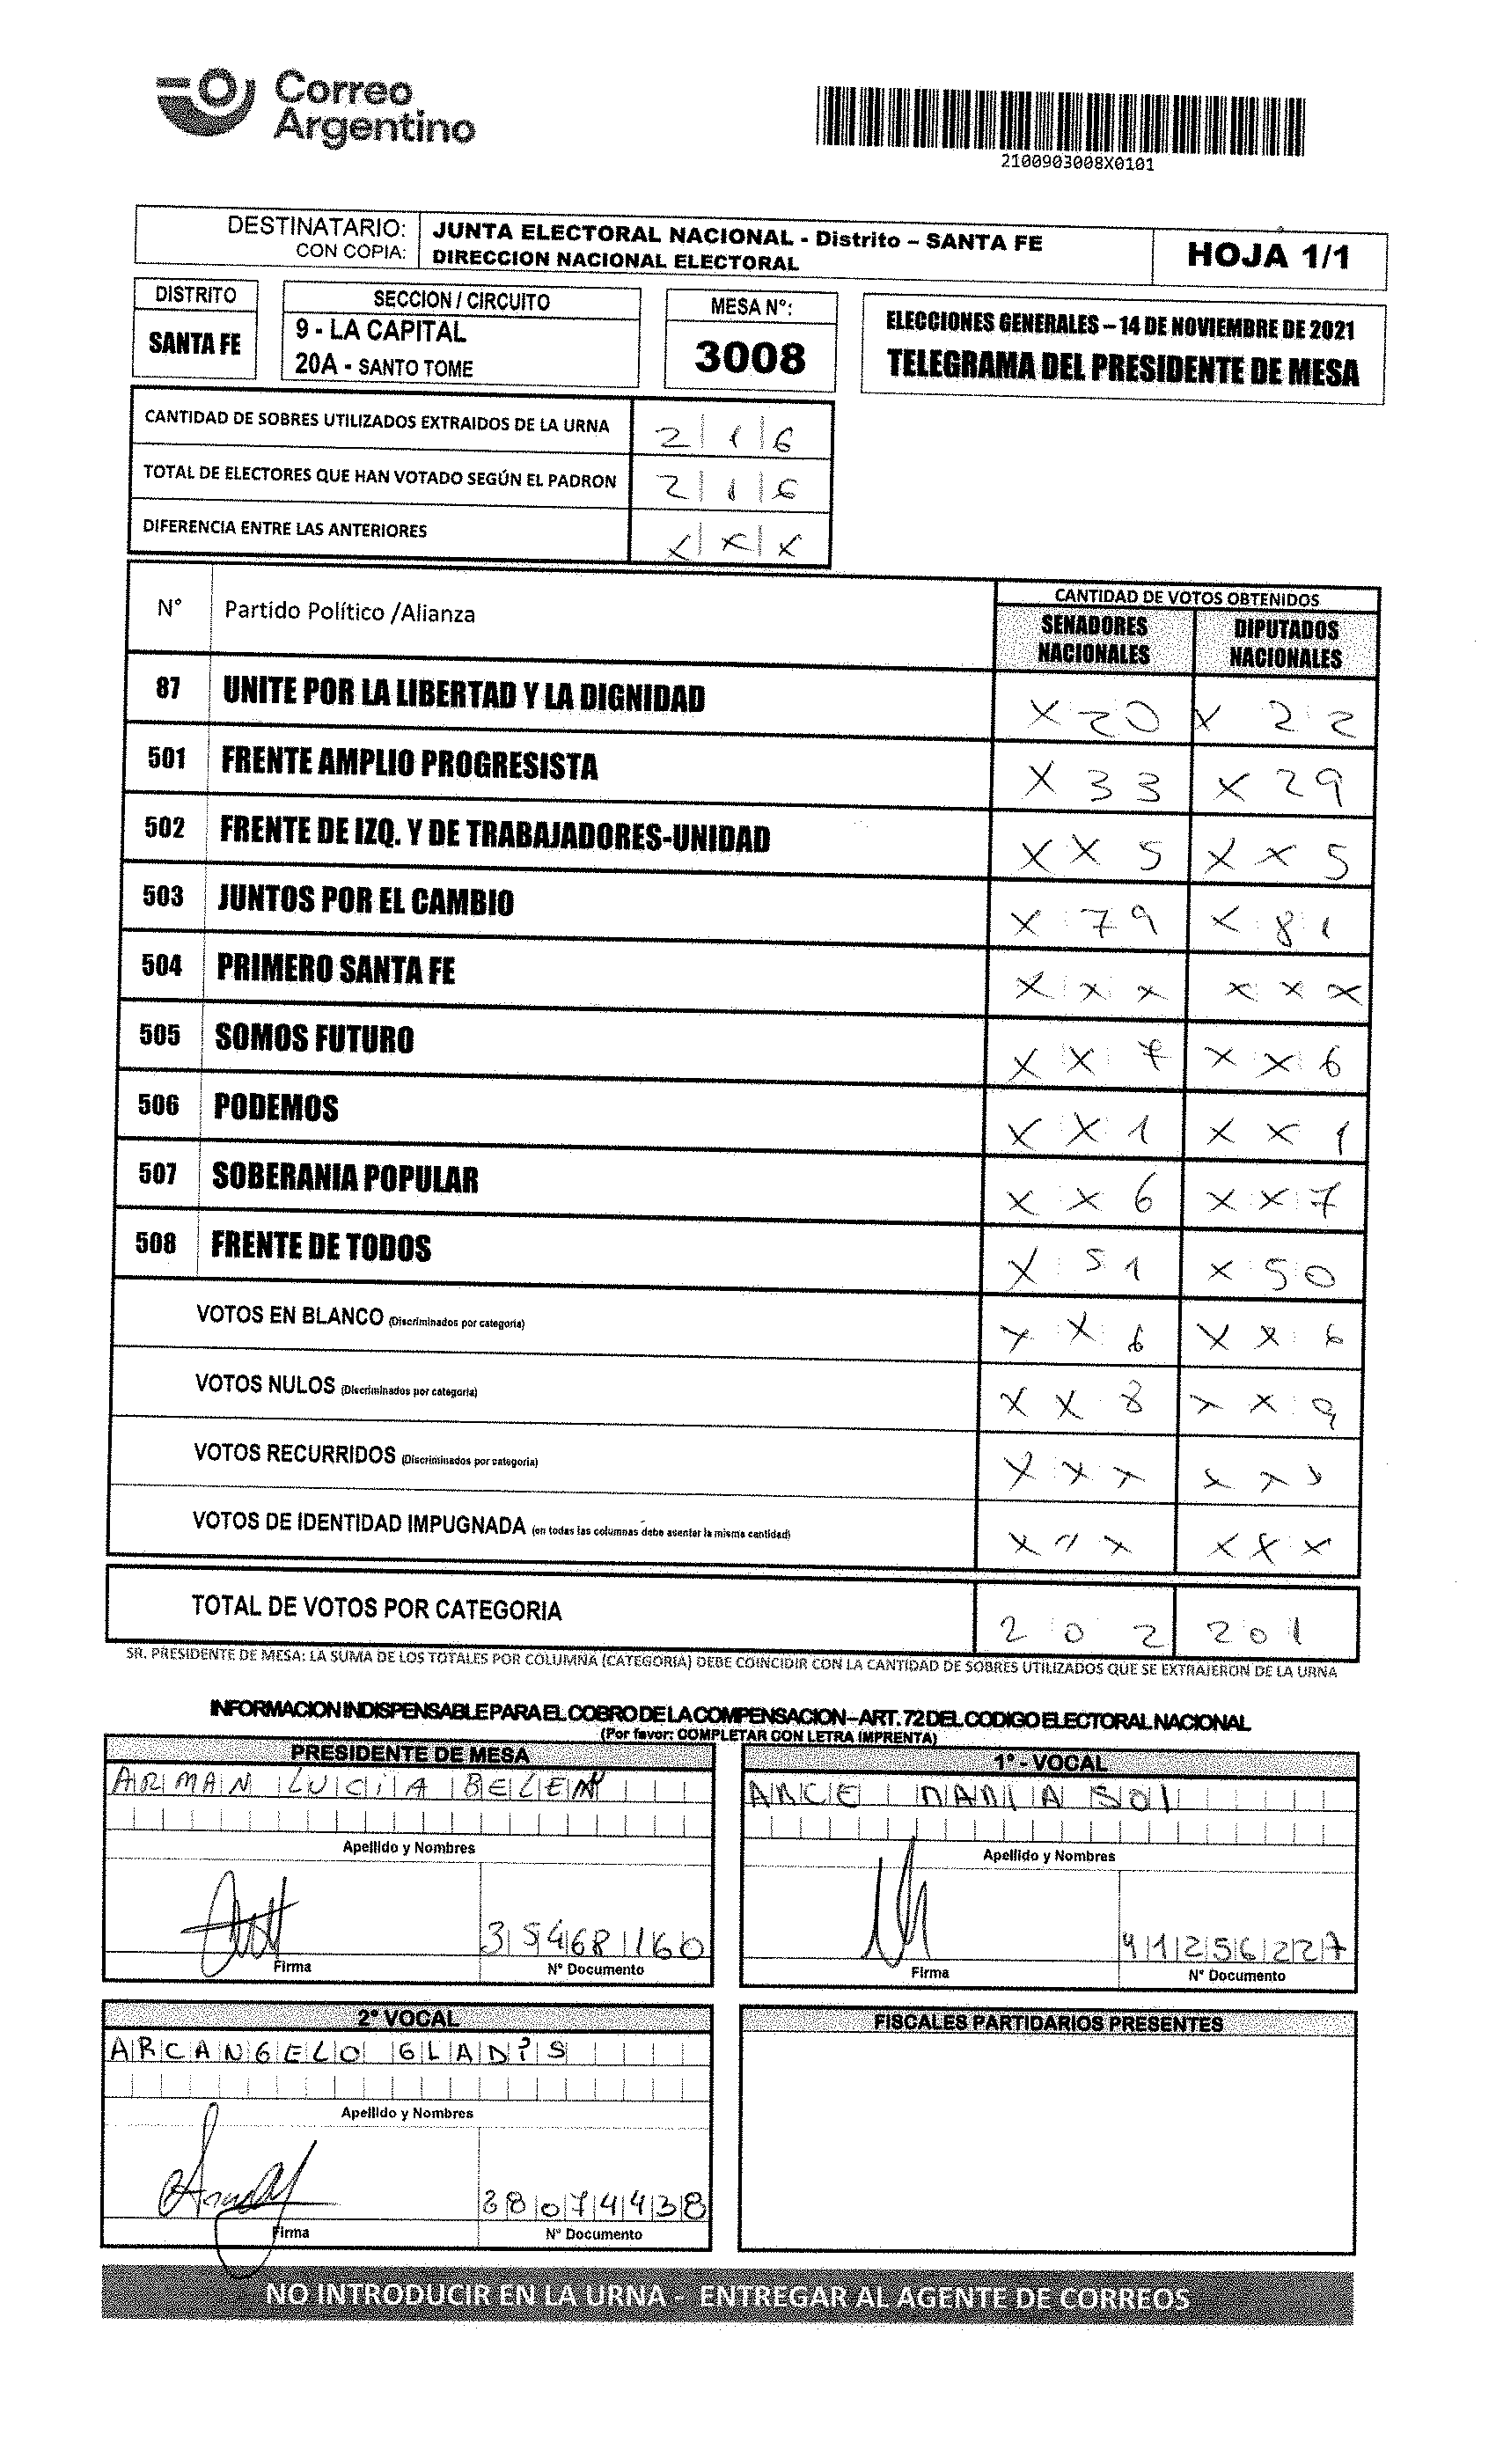

In [115]:
img = cv2.imread(f'C:/Users/Lianz/Documents/medgc-tesis/data/01_raw/telegramas/{img_id}.tiff')
imgshow(img)

In [15]:
(
    predicciones
    .query(f"id_telegrama == '{img_id}'")
    .query("algoritmo == 'adda'")
)

,id_telegrama,partido,tipo,mesa,votos,voto_predicho,iou,algoritmo,acierto
239022,2100100034X,UNITE POR LA LIBERTAD Y LA DIGNIDAD,SENADORES NACIONALES,00034X,6,48,0.000000,adda,0
239023,2100100034X,UNITE POR LA LIBERTAD Y LA DIGNIDAD,DIPUTADOS NACIONALES,00034X,6,96,0.500000,adda,0
239024,2100100034X,FRENTE AMPLIO PROGRESISTA,SENADORES NACIONALES,00034X,48,5,0.000000,adda,0
239025,2100100034X,FRENTE AMPLIO PROGRESISTA,DIPUTADOS NACIONALES,00034X,46,5,0.000000,adda,0
239026,2100100034X,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,SENADORES NACIONALES,00034X,5,87,0.000000,adda,0
239027,2100100034X,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,DIPUTADOS NACIONALES,00034X,5,81,0.000000,adda,0
239028,2100100034X,JUNTOS POR EL CAMBIO,SENADORES NACIONALES,00034X,81,8,0.500000,adda,0
239029,2100100034X,JUNTOS POR EL CAMBIO,DIPUTADOS NACIONALES,00034X,81,8,0.500000,adda,0
239030,2100100034X,PRIMERO SANTA FE,SENADORES NACIONALES,00034X,2,8,0.000000,adda,0
239031,2100100034X,PRIMERO SANTA FE,DIPUTADOS NACIONALES,00034X,2,3,0.000000,adda,0
